Chapter 5
# 用指定色号和平面散点图可视化HSV色彩空间，极坐标
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [2]:
# 导入包
import numpy as np
import colorsys
import matplotlib.pyplot as plt 
import math
import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 1. 定义函数用来绘制HSV色盘

In [8]:
def polar_circles(num_r, num_n):
    r_array = np.linspace(0,1,num_r)
    # 极径 [0, 1] 分成若干等份
    
    t_array = np.linspace(0, 2*np.pi, num_n, endpoint=False)
    # 极角 [0, 2*pi] 分成若干等份
    # HSV 色号三个值最后也会转化成 [0, 1] 之间的数值
    
    rr, tt = np.meshgrid(r_array, t_array)
    # 生成极坐标网格数据
    
    circles = np.column_stack([rr.ravel(), tt.ravel()])
    # rr.ravel() 将二维数组展开成一维数组
    # numpy.column_stack() 则一维数组按列方向堆叠构成一个二维数组
        
    return circles

def plot_HSV_polar(value = 1, num_r = 21, num_n = 120):

    circles = polar_circles(num_r, num_n)
    # 自定义函数生成散点极坐标
    
    RHO = circles[:,0]
    PHI = circles[:,1]
    # RHO：极角
    # PHI：极径

    h_ = (PHI-PHI.min()) / (PHI.max()-PHI.min()) 
    # 色调取值转换为 [0, 1] 区间

    s_ = RHO
    # 饱和度
    v_ = np.ones_like(RHO)*value
    # 明暗度为定值
    # 自定义函数中，默认为 value = 1
    
    fig = plt.figure(figsize = (3,3))
    ax = fig.add_subplot(projection='polar')
    # 绘制极坐标

    h,s,v = h_.flatten().tolist(), s_.flatten().tolist(), v_.flatten().tolist()
    c = [colorsys.hsv_to_rgb(*x) for x in zip(h,s,v)]
    # colorsys.hsv_to_rgb() 完成 HSV 色号向 RGB 色号转换
    c = np.array(c)

    ax.scatter(PHI, RHO, c=c, s = 3, alpha = 1)
    # ax.axis('off')
    ax.set_rlim(0,1)
    ax.set_xticks(np.linspace(0,  2*np.pi, 12, endpoint=False))
    ax.tick_params("both", grid_linewidth=0.5)
    ax.set_rlabel_position(0)
    ax.set_axisbelow(False)

    fig.savefig('Figures/HSV色盘_极坐标网格_V_' + str(value) + '.svg', format='svg')
    plt.show()

### 2. 绘制HSV色盘，颗粒度高

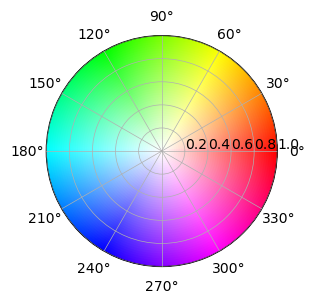

In [9]:
plot_HSV_polar(value = 1, num_r = 51, num_n = 780)

### 3. 绘制HSV色盘，明暗度 Value = 1.0

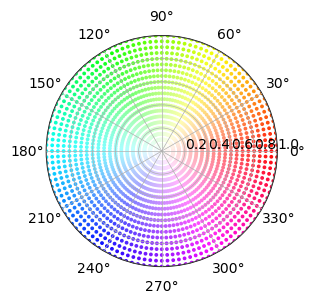

In [18]:
plot_HSV_polar(value = 1)

### 4. 绘制HSV色盘，明暗度 Value = 0.8

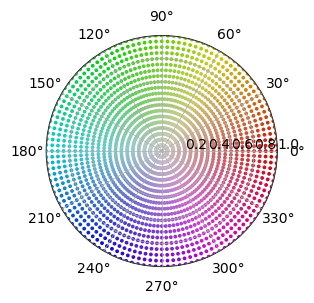

In [12]:
plot_HSV_polar(value = 0.8)

### 5. 绘制HSV色盘，明暗度 Value = 0.6

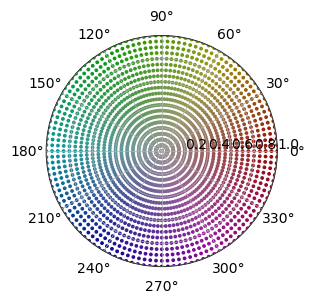

In [13]:
plot_HSV_polar(value = 0.6)

### 6. 绘制HSV色盘，明暗度 Value = 0.4

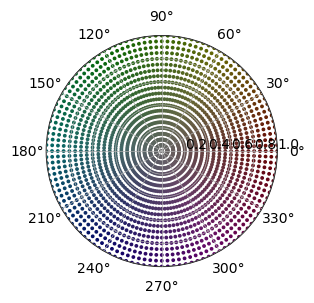

In [15]:
plot_HSV_polar(value = 0.4)

### 7. 绘制HSV色盘，明暗度 Value = 0.2

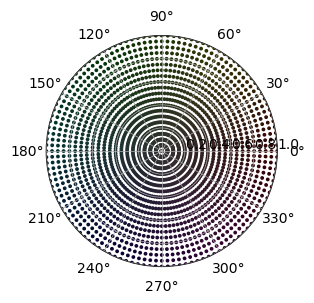

In [16]:
plot_HSV_polar(value = 0.2)

### 8. 绘制HSV色盘，明暗度 Value = 0.0

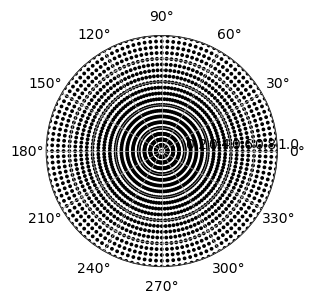

In [17]:
plot_HSV_polar(value = 0)

In [10]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023